<a href="https://colab.research.google.com/github/nbrrawal/DIY_PROEJCTS/blob/master/Stocks_POC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install tensorflow

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
%pip install keras

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.layers import LSTM


In [2]:
#Get the Dataset
df_cipla=pd.read_csv('CIPLA.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df_cipla.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [3]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df_cipla. shape)
print("Null Value Present: ", df_cipla.isnull().values.any())

Dataframe Shape:  (5306, 14)
Null Value Present:  True


<Axes: xlabel='Date'>

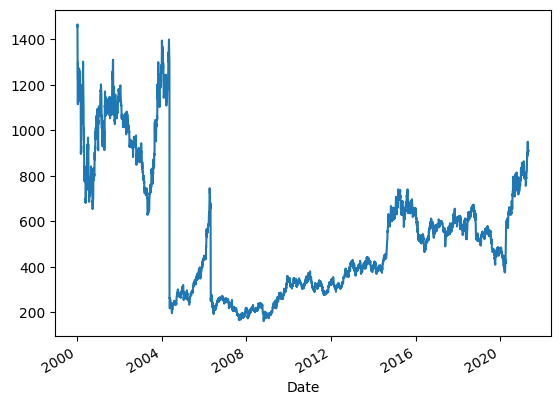

In [4]:
df_cipla['Close'].plot()

In [5]:
output_var = pd.DataFrame(df_cipla['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [6]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df_cipla[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df_cipla.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2000-01-03,0.908399,0.941757,0.961128,0.000361
2000-01-04,1.000000,1.000000,1.000000,0.000522
2000-01-05,0.954560,0.953932,0.949416,0.000585
2000-01-06,0.925710,0.925414,0.936965,0.000573
2000-01-07,0.879548,0.892435,0.857899,0.001161


In [7]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [10]:
X_train.shape

(4824, 1, 4)

In [8]:
#Process the data for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)

X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

NameError: ignored

In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

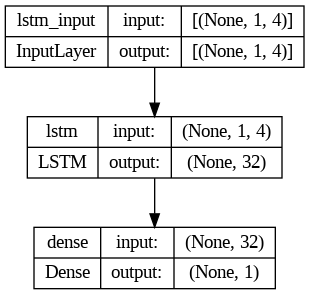

In [ ]:
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
y_pred= lstm.predict(X_test)

16/16 [==============================] - 0s 3ms/step


NameError: ignored

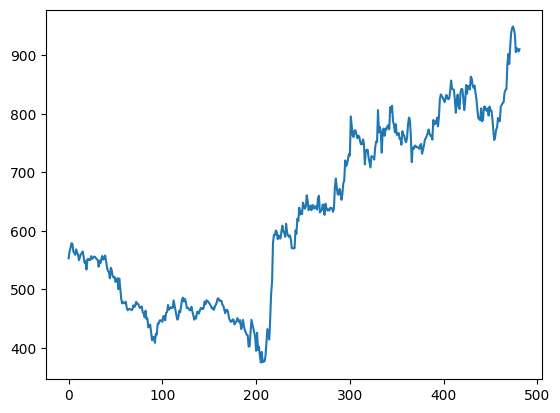

In [23]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [ ]:
#save model
lstm.save('my_model.h5')

# Prediction on new Stock

In [ ]:
df_new_stock.isnull().values.any()

True

<Axes: xlabel='Date'>

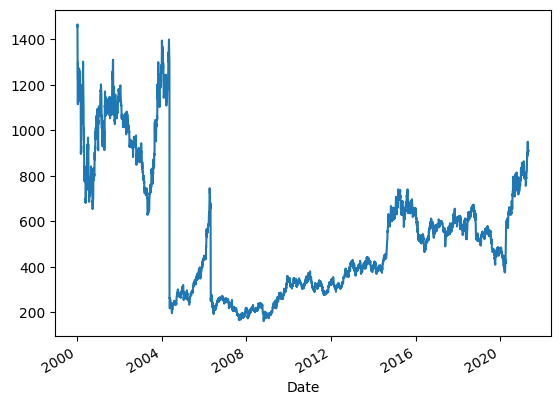

In [17]:
df_cipla['Close'].plot()

<Axes: xlabel='Date'>

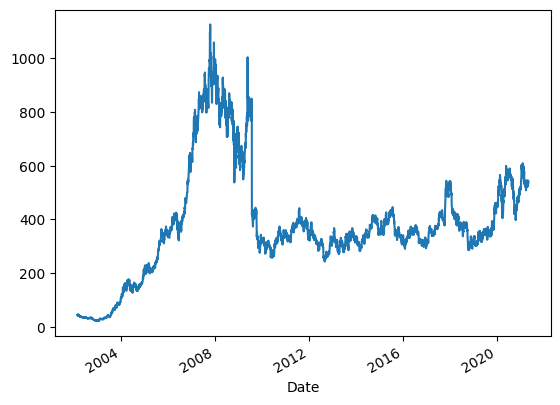

In [16]:
df_new_stock['Close'].plot()

In [37]:
df_new_stock=pd.read_csv("RELIANCE.NS.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df_new_stock[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df_new_stock.index)
print(feature_transform.shape)
trainX = np.array(feature_transform)
X_train = trainX.reshape(feature_transform.shape[0], 1, feature_transform.shape[1])

print(X_train.shape)
y_actual = np.array( df_new_stock["Close"])
print(y_actual)


(247, 4)
(247, 1, 4)
[2550.899902 2565.050049 2557.050049 2579.100098 2617.600098 2707.550049
 2712.199951 2731.350098 2723.300049 2722.149902 2682.449951 2690.199951
 2650.5      2649.25     2609.100098 2613.100098 2625.       2615.5
 2578.350098 2565.600098 2599.300049 2621.800049 2584.5      2577.800049
 2502.199951 2524.050049 2544.699951 2544.449951 2543.300049 2547.199951
 2575.899902 2557.050049 2518.550049 2514.050049 2536.899902 2596.800049
 2558.399902 2526.149902 2471.600098 2467.600098 2444.100098 2478.800049
 2474.699951 2472.050049 2442.649902 2430.300049 2415.949951 2382.550049
 2337.350098 2359.75     2353.850098 2339.899902 2326.949951 2329.
 2311.449951 2305.899902 2351.949951 2356.050049 2336.649902 2323.350098
 2378.100098 2431.949951 2430.050049 2440.199951 2414.399902 2434.100098
 2378.899902 2367.5      2383.699951 2367.850098 2322.550049 2343.899902
 2326.050049 2385.399902 2408.699951 2417.350098 2359.25     2322.699951
 2284.5      2275.949951 2237.050049 2225

In [12]:
X_train.shape

(4824, 1, 4)

In [38]:
# returns a compiled model
# identical to the previous one
lstm = load_model('my_model.h5')
y_new_stock= lstm.predict(X_train)

8/8 [==============================] - 0s 2ms/step


In [60]:
y_new_stock.tolist()

[[957.9967651367188],
 [911.7833251953125],
 [949.478759765625],
 [954.6728515625],
 [1017.3148803710938],
 [1051.46240234375],
 [1250.6429443359375],
 [1279.9774169921875],
 [1304.2265625],
 [1282.9586181640625],
 [1235.825439453125],
 [1176.4315185546875],
 [1172.7471923828125],
 [1133.867431640625],
 [1096.135009765625],
 [1017.1820068359375],
 [1057.2542724609375],
 [1079.0311279296875],
 [1010.1683349609375],
 [987.479736328125],
 [984.9803466796875],
 [1002.7902221679688],
 [1038.781982421875],
 [995.6412963867188],
 [906.7076416015625],
 [837.4796752929688],
 [870.1947021484375],
 [881.466064453125],
 [877.0101318359375],
 [922.34033203125],
 [931.478759765625],
 [936.771728515625],
 [896.6239013671875],
 [850.029052734375],
 [870.1285400390625],
 [945.104736328125],
 [985.7722778320312],
 [897.921875],
 [816.9412231445312],
 [702.1094970703125],
 [709.9290771484375],
 [722.6832275390625],
 [747.21630859375],
 [735.4818725585938],
 [716.0916748046875],
 [682.3809814453125],
 [62

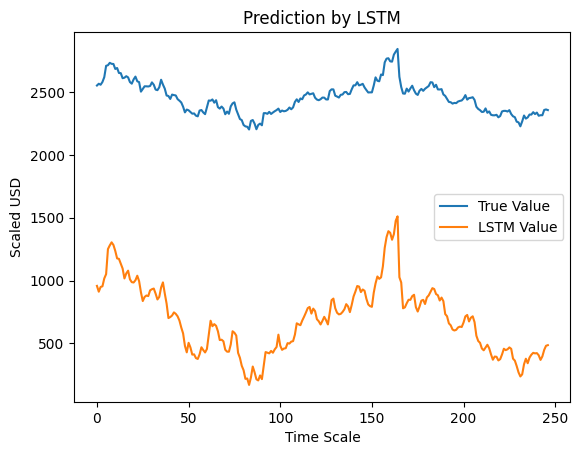

In [43]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_actual, label='True Value')
plt.plot(y_new_stock, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Rupee')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import accuracy_score

final_score= r2_score(y_actual, y_new_stock+1602)
final_score

-1.883420019604742

In [49]:
output= pd.DataFrame( list(zip(y_actual ,y_new_stock)), columns =["actual", "predicted"])
output

,actual,predicted
0,2550.899902,[957.99677]
1,2565.050049,[911.7833]
2,2557.050049,[949.47876]
3,2579.100098,[954.67285]
4,2617.600098,[1017.3149]
...,...,...
242,2314.899902,[369.59274]
243,2314.600098,[397.29324]
244,2356.449951,[448.9059]
245,2360.699951,[481.76813]


from matplotlib import pyplot as plt
output['actual'].plot(kind='hist', bins=20, title='actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output['actual'].plot(kind='line', figsize=(8, 4), title='actual')
plt.gca().spines[['top', 'right']].set_visible(False)